In [57]:
library(ggplot2)
library(ggpubr)
library(corrplot)
library(RColorBrewer)
library(ggrepel)
library(argparse)
library(Matrix)
library(data.table)
options(bitmapType = 'cairo', device = 'png')
Sys.setlocale("LC_NUMERIC", "C")

setwd('/psycl/g/mpsziller/lucia/')
functR <- 'priler_project/Figure_CASTom-iGEx_paper/Functions_prediction_plots.R'
source(functR)

color_file <- 'priler_project/Figures/color_tissues.txt'
fold <- 'CAD_UKBB/eQTL_PROJECT/OUTPUT_GTEx/predict_CAD/AllTissues/200kb/CAD_GWAS_bin5e-2/UKBB/'
pheno <- 'CAD_HARD'
train_fold <- 'CAD_UKBB/eQTL_PROJECT/OUTPUT_GTEx/train_GTEx/'
type_dat <- 'CAD_HARD-UKBB'
pval_FDR <- 0.05

# load results
color_tissues <- read.table(color_file, h=T, stringsAsFactors = F)
tscore <- fread(sprintf('%stscore_pval_%s_covCorr.txt', fold, pheno), h=T, stringsAsFactors = F, sep = '\t', data.table = F)
pathR <- fread(sprintf('%spath_Reactome_pval_%s_covCorr_filt.txt', fold, pheno), h=T, stringsAsFactors = F, sep = '\t', data.table = F)
pathGO <- fread(sprintf('%spath_GO_pval_%s_covCorr_filt.txt', fold, pheno), h=T, stringsAsFactors = F, sep = '\t', data.table = F)
tissues <- unique(tscore$tissue)
train_fold <- paste0(train_fold, tissues, '/200kb/CAD_GWAS_bin5e-2/')
out_fold <- 'priler_project/Figure_CASTom-iGEx_paper/CAD_part1/'

# gene location
tscore$start_position <- NA
tscore$chrom <- NA
tscore$TSS_start <- NA
for(i in 1:length(train_fold)){
  tmp <- fread(sprintf('%s/resPrior_regEval_allchr.txt', train_fold[i]), h=T,stringsAsFactors = F, data.table = F)
  tmp <- tmp[match(tscore$ensembl_gene_id[tscore$tissue == tissues[i]], tmp$ensembl_gene_id),]
  tscore$start_position[tscore$tissue == tissues[i]] <- tmp$start_position
  tscore$chrom[tscore$tissue == tissues[i]] <- tmp$chrom
  tscore$TSS_start[tscore$tissue == tissues[i]] <- tmp$TSS_start   
}



[1] "C"

png 
  2

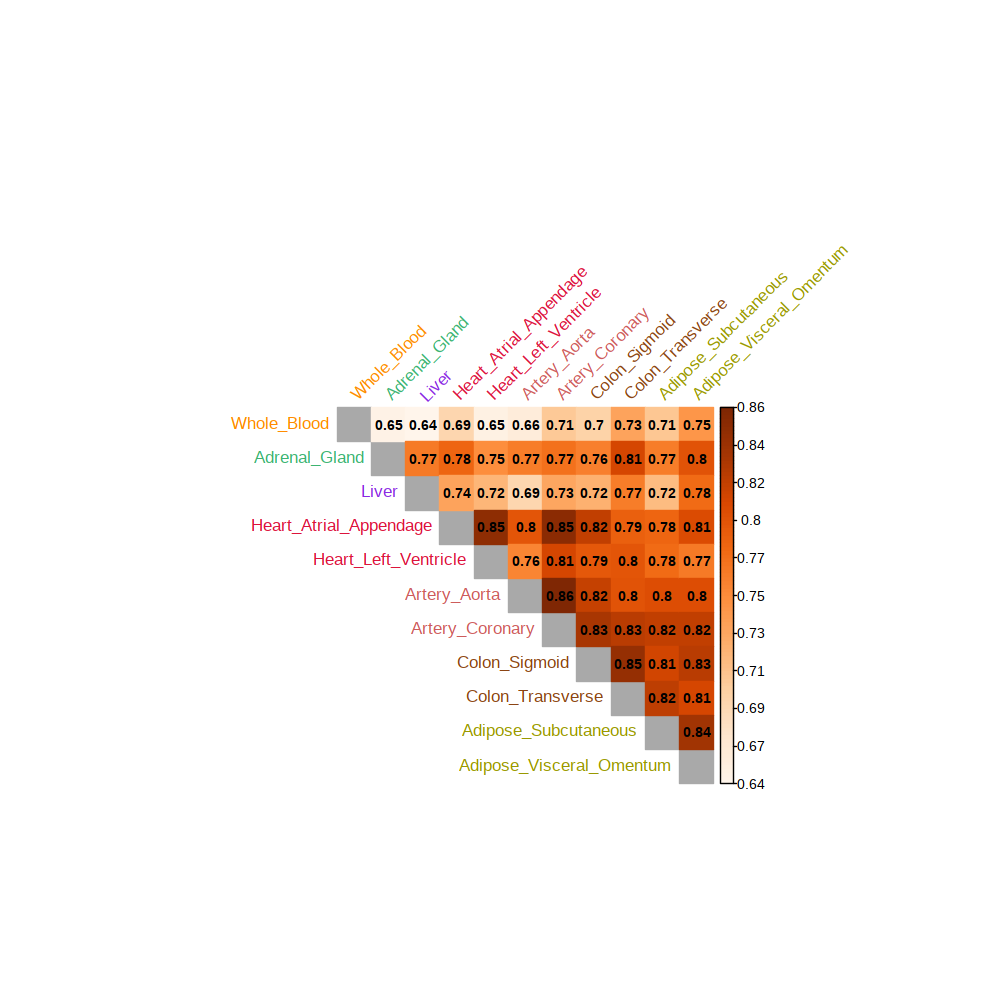

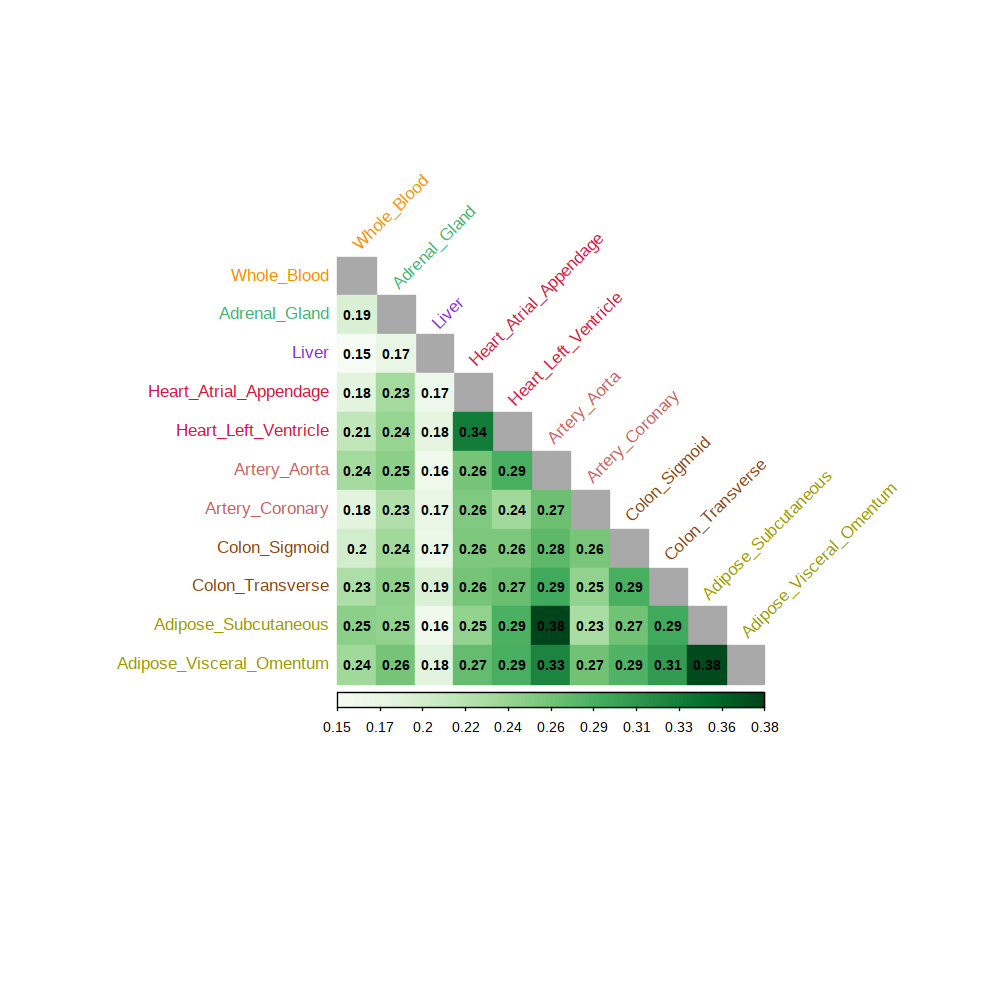

In [7]:
###########################################################
### spearman correlation and Jaccard index shared genes ###
###########################################################
# Fig. 1C
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

tscore_cor <- create_cor(tissues_name = tissues, res = tscore, id_z = 7)
# save
pl_corr(tscore_cor, type_mat = 'tscore', type_dat = type_dat, tissues_name = tissues, df_color = color_tissues, outFold = out_fold, width_pl = 10, height_pl = 7)

# print plots corr + perc
col_val <- colorRampPalette(brewer.pal(9, "Oranges"))
ord <- corrMatOrder(tscore_cor$cor, order = "hclust", hclust.method = "ward.D")
newcolours <- color_tissues$color[match(tissues, color_tissues$tissues)][ord]
diag(tscore_cor$cor) <- NA
corrplot(tscore_cor$cor, type = "upper", order = "hclust", hclust.method = "ward.D", 
        tl.col = newcolours, col = col_val(100),
        method = "color", tl.srt = 45, cl.align.text = "c", addCoef.col = "black", 
        na.label = "square", na.label.col = "darkgrey", is.corr = FALSE, 
        number.cex = 0.8)

diag(tscore_cor$perc) <- NA
col_val <- colorRampPalette(brewer.pal(9, "Greens"))(100)
corrplot(tscore_cor$perc[ord, ord], type = "lower", tl.col = newcolours, 
        col = col_val, method = "color", tl.srt = 45, 
        cl.align.text = "c", addCoef.col = "black", na.label = "square", 
        na.label.col = "darkgrey", is.corr = F, number.cex = 0.8)



[1] "tscore"


,tissue,n_tot,n_sign,n_unique,n_unique_sign
,<fct>,<int>,<int>,<int>,<int>
12,All,36424,383,13408,180


[1] "tscore not MHC"


,tissue,n_tot,n_sign,n_unique,n_unique_sign
,<fct>,<int>,<int>,<int>,<int>
12,All,35571,303,13216,163


[1] "path-Reactome"


,tissue,n_tot,n_sign,n_unique,n_unique_sign
,<fct>,<int>,<int>,<int>,<int>
12,All,9024,143,1435,102


[1] "path-GO"


,tissue,n_tot,n_sign,n_unique,n_unique_sign
,<fct>,<int>,<int>,<int>,<int>
12,All,24620,351,4982,299


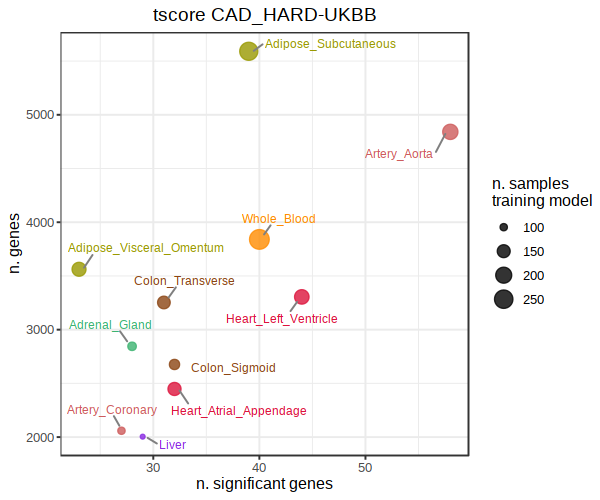

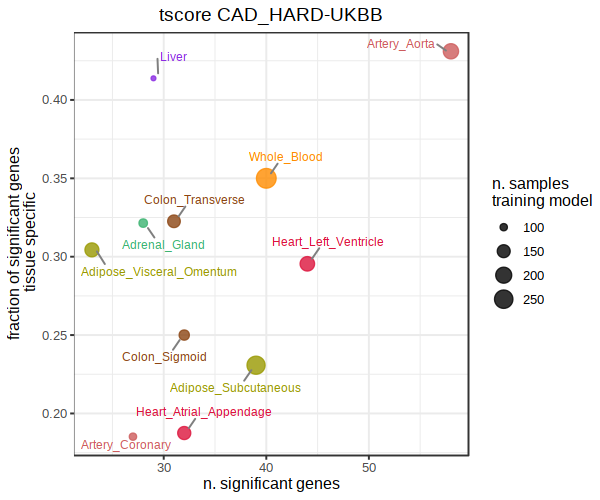

In [8]:
############################################################
### plot number of association per tissue vs specificity ###
############################################################
# Fig. S5A-B
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 100)

tscore_nsgin <- creat_dfnsign(tissues_name = tissues, res = tscore, id_pval_corr = 10, 
                              pval_FDR = pval_FDR, df_color = color_tissues, id_pval_corr_tot = 10)
pathR_nsgin <- creat_dfnsign(tissues_name = tissues, res = pathR, id_pval_corr = 15, 
                             pval_FDR = pval_FDR, df_color = color_tissues, id_pval_corr_tot = 15)
pathGO_nsgin <- creat_dfnsign(tissues_name = tissues, res = pathGO, id_pval_corr = 17, 
                              pval_FDR = pval_FDR, df_color = color_tissues, id_pval_corr_tot = 17)
tscore_red <- tscore
HLA_reg <- c(26000000, 34000000)
tscore_red <- tscore_red[!(tscore_red$chrom %in% 'chr6' & tscore_red$start_position <=HLA_reg[2] & tscore_red$start_position >= HLA_reg[1]) , ]
tscore_noMHC_nsgin <- creat_dfnsign(tissues_name = tissues, res = tscore_red, id_pval_corr = 10, pval_FDR = pval_FDR, df_color = color_tissues, id_pval_corr_tot = 12)

print('tscore')
tscore_nsgin$table[length(tissues)+1,]
print('tscore not MHC')
tscore_noMHC_nsgin$table[length(tissues)+1,]
print('path-Reactome')
pathR_nsgin$table[length(tissues)+1,]
print('path-GO')
pathGO_nsgin$table[length(tissues)+1,]

# save
pl <- pl_number_function(df = tscore_nsgin$plot, type_mat = 'tscore', outFold = out_fold, type_dat = type_dat)

# plot
pl$ngen
pl$frac




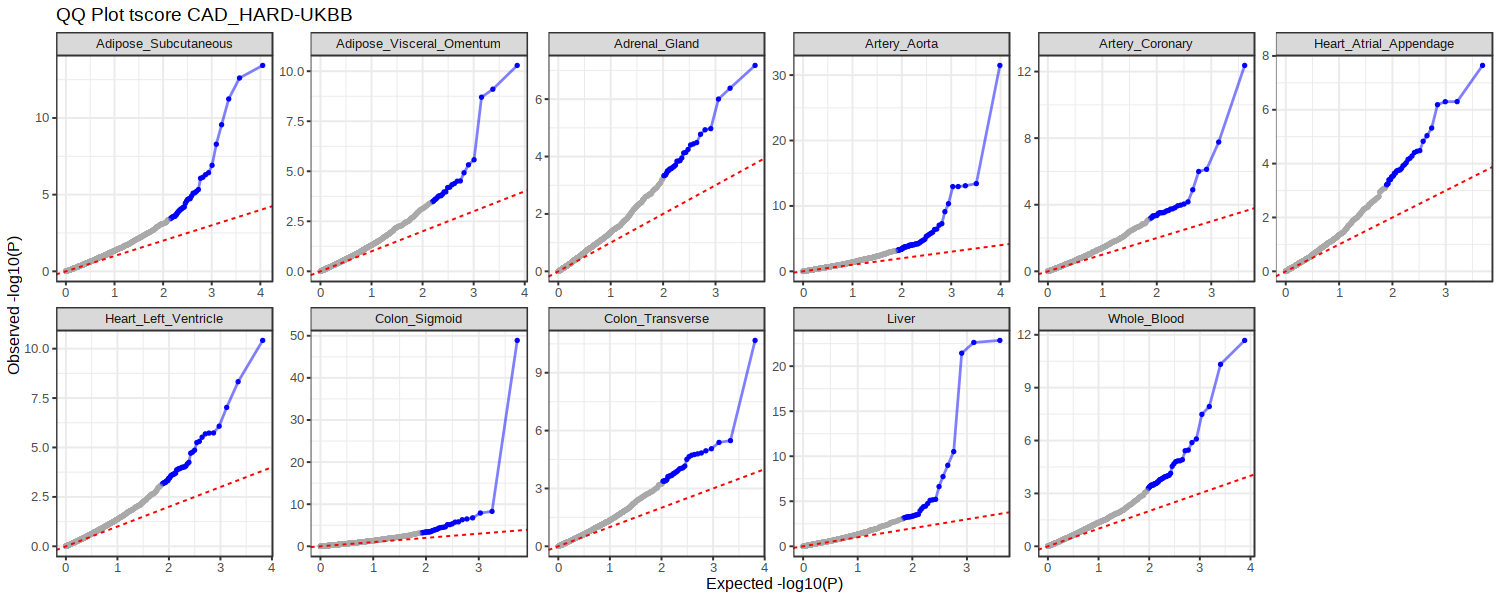

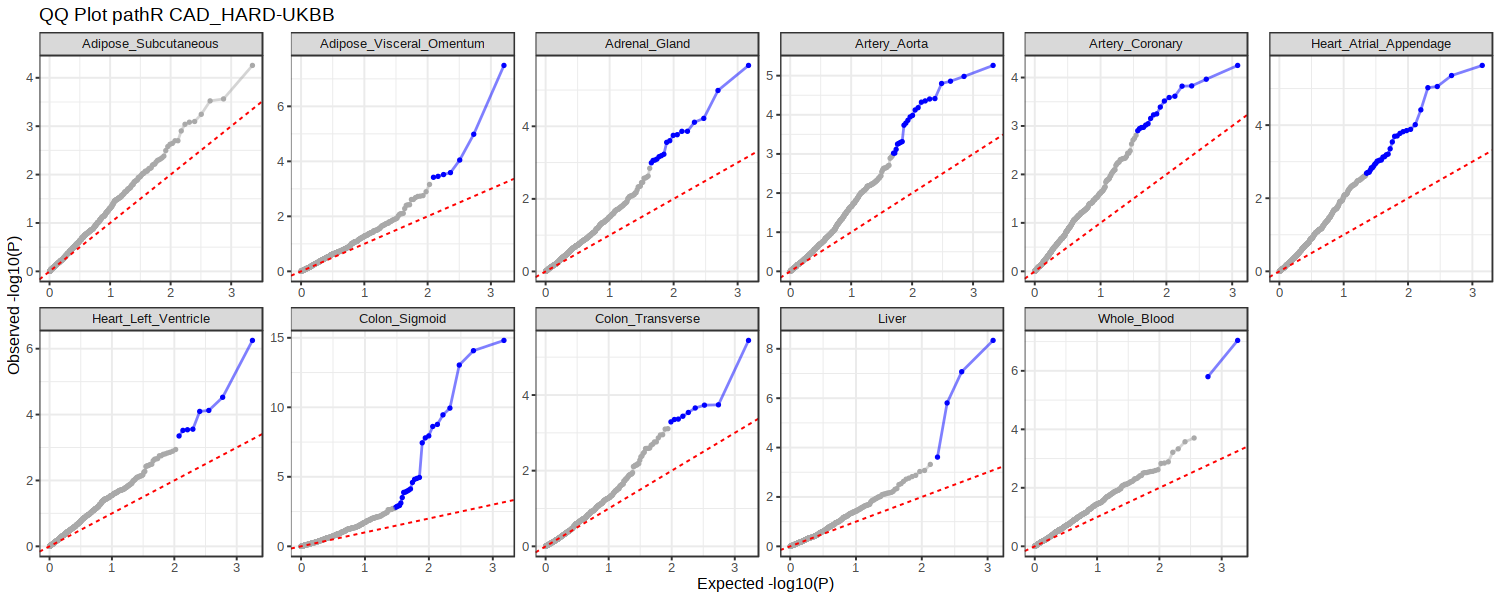

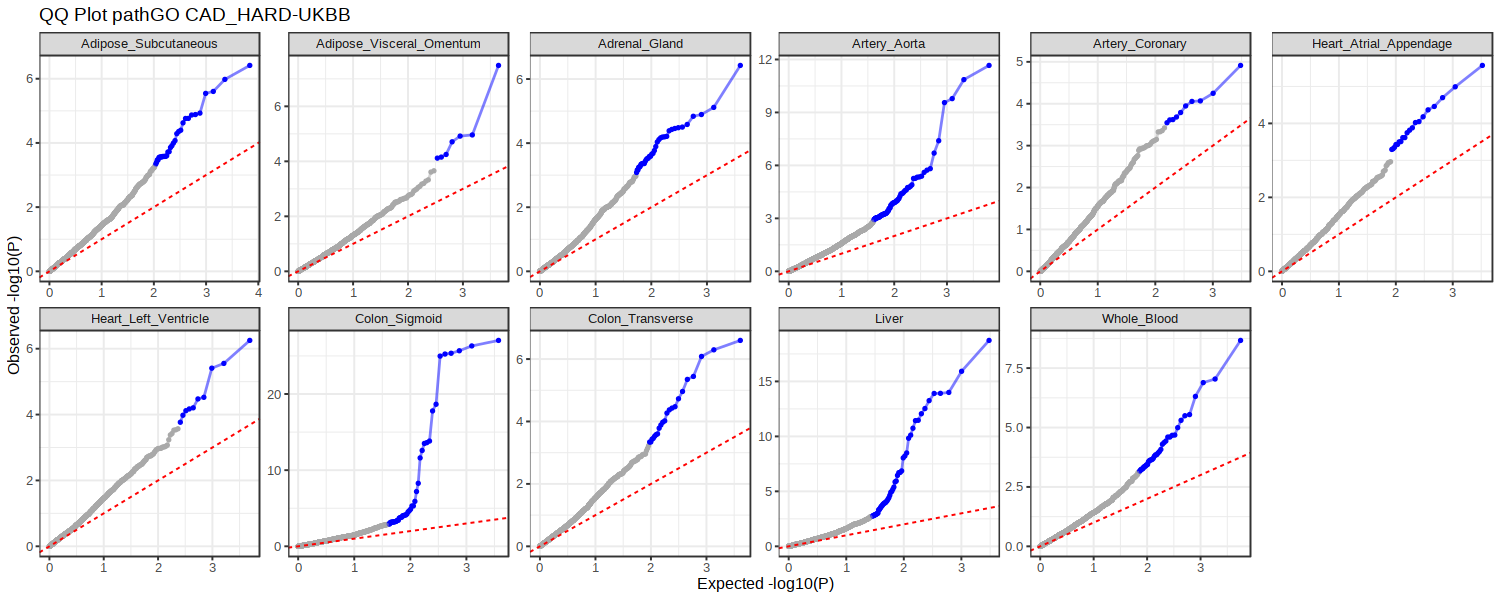

In [60]:
####################################
### plot qq-plot tissue specific ###
####################################
options(repr.plot.width = 15, repr.plot.height = 6, repr.plot.res = 100)

# tscore
res <- qq_plot_tissues(data = tscore, color_tissues = color_tissues, id_pval = 8, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'tscore', 
                type_dat = type_dat, width_plot = 12, height_plot = 6)
#res$genomic_infl
res$qq_pl
# path Reactome
res <- qq_plot_tissues(data = pathR, color_tissues = color_tissues, id_pval = 13, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'pathR', 
                type_dat = type_dat, width_plot = 12, height_plot = 6)
#res$genomic_infl
res$qq_pl
# path GO
res <- qq_plot_tissues(data = pathGO, color_tissues = color_tissues, id_pval = 15, 
                pval_FDR = pval_FDR, outFold = out_fold, type_mat = 'pathGO', 
                type_dat = type_dat, width_plot = 12, height_plot = 6)
#res$genomic_infl
res$qq_pl



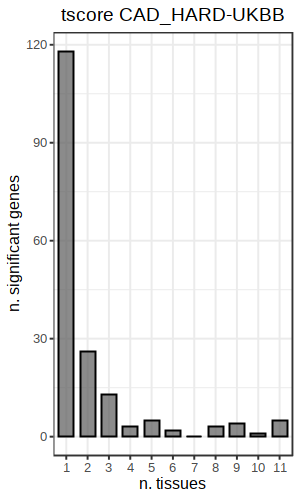

In [9]:
##################################################
### plot number of genes per number of tissues ###
##################################################
# Fig. 1B
options(repr.plot.width = 3, repr.plot.height = 5, repr.plot.res = 100)

tscore_nsgin_tissue <- creat_dfnsign_tissueSpec(tissues_name = tissues, res = tscore, id_pval_corr = 10, 
                                                pval_FDR = pval_FDR)
# save
pl <- pl_numberSpec_function(df = tscore_nsgin_tissue, type_mat = 'tscore', outFold = out_fold, type_dat = type_dat)

# plot
pl

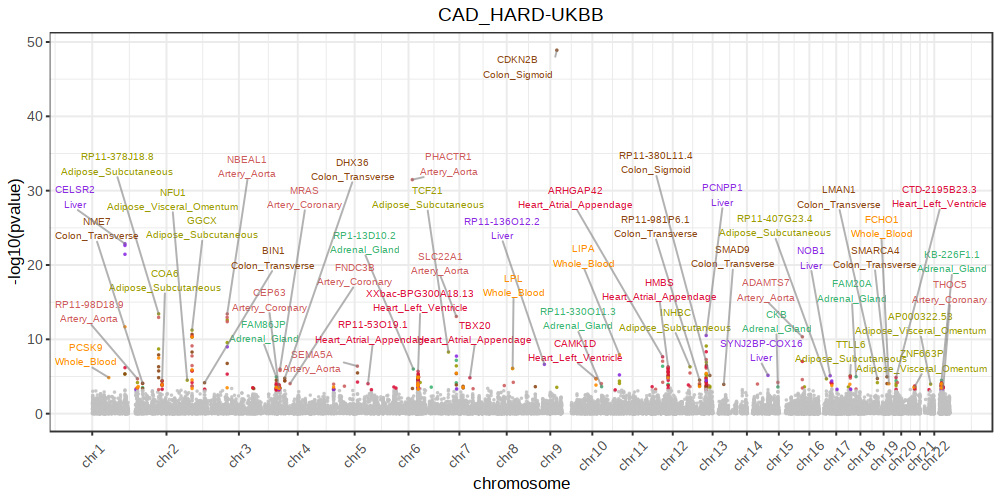

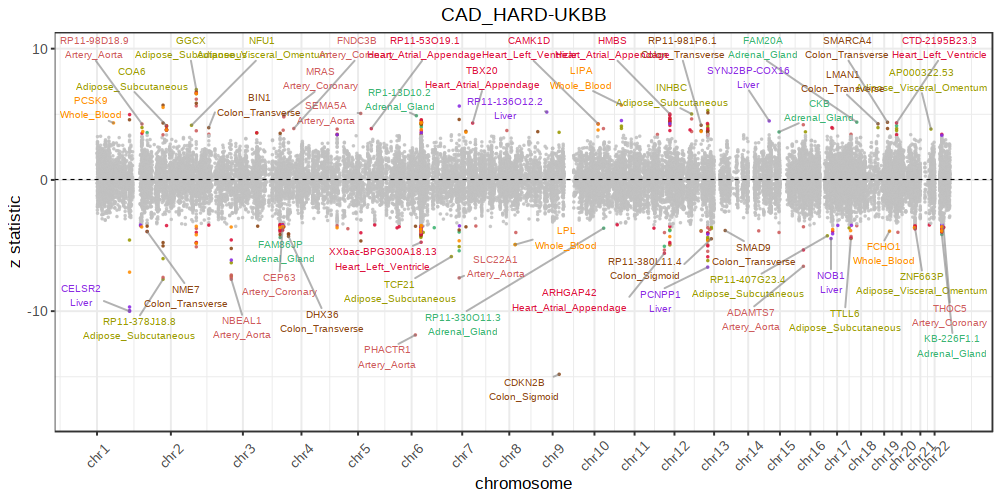

In [13]:
############################
### manhattan plot genes ###
############################
# Fig. 1A
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 100)

n_sign <- 20
# for each tissue keep name of the 20 most significant genes
tscore_df <- create_df_manhattan_plot(tissues_name = tissues, res = tscore, id_pval = 8, 
                                      pval_FDR = pval_FDR, df_color = color_tissues, id_name = 2, 
                                      n_sign = n_sign, gene = T)
# include only 1 gene per locus
new_list <- tscore_df$df[tscore_df$df$sign_name == 'yes', ]
dist_mat <- as.matrix(dist(new_list$id_pos, method = 'manhattan'))
keep_t <- new_list$name
# recursevly until no intersection
tmp <- new_list
while(any(dist_mat[upper.tri(dist_mat)] < 3)){
  
  t_list <- apply(dist_mat, 1, function(x) x < 3)
  len_t <- c()
  keep_t <- c()
  for(j in 1:nrow(t_list)){
    tmp_sel <-  new_list[new_list$name %in% tmp$name[t_list[j,]],]
    tmp_sel <- tmp_sel[!tmp_sel$name %in% len_t, ]
    len_t <- unique(c(len_t, tmp_sel$name))
    keep_t <- unique(c(keep_t, tmp_sel$name[which.max(tmp_sel$pval_tr)]))
  }
  
  tmp <- tmp[tmp$name %in% keep_t, ]
  dist_mat <- as.matrix(dist(tmp$id_pos,method = 'manhattan'))
  
}
tscore_df$df$sign_name[tscore_df$df$sign_name == 'yes' & !tscore_df$df$name %in% tmp$name] <- 'no'
tscore_df$df$name[tscore_df$df$sign_name == 'no'] <- ''

# save
pl_tot <- pl_manhattan_function(data_input = tscore_df, type_mat = 'tscore', outFold = out_fold, type_dat = type_dat)
# plot
pl_tot$manhattan_pl
pl_tot$zstat_pl
                  
                  
                  

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


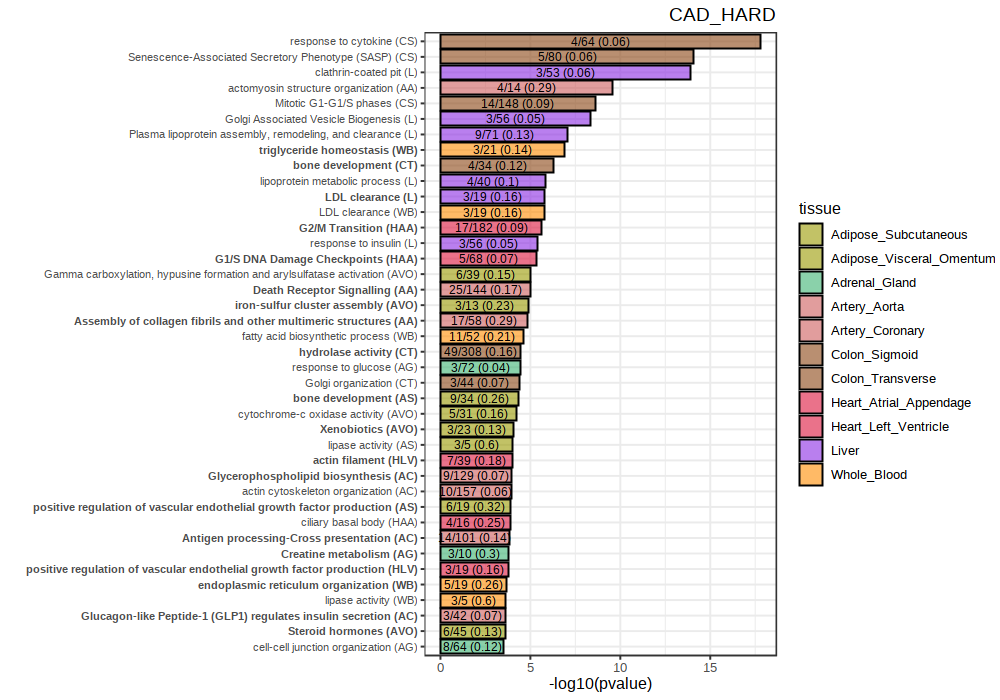

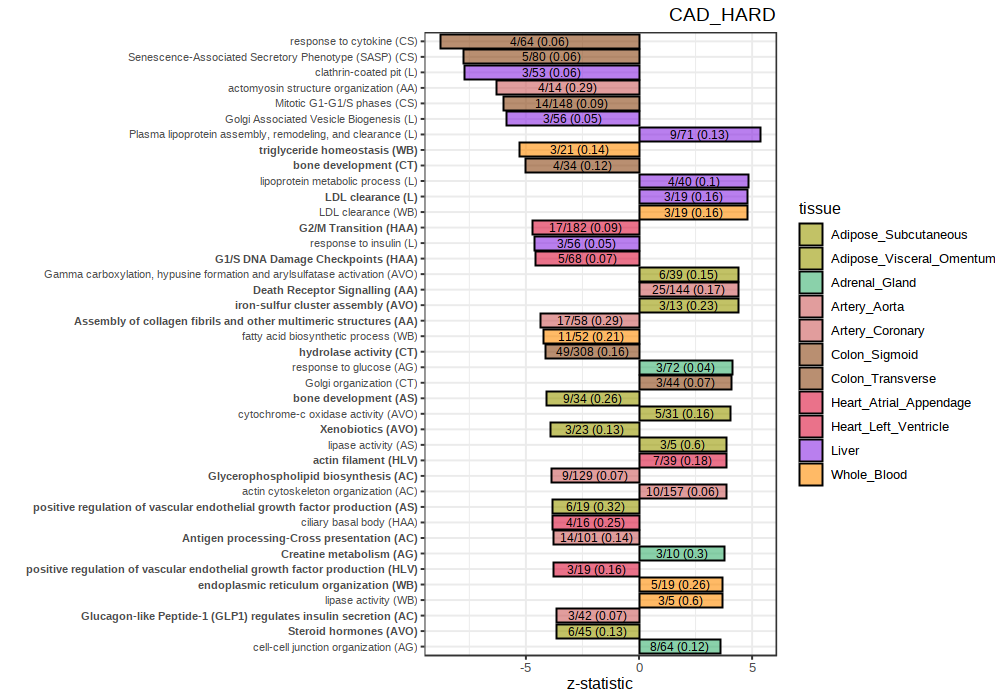

In [15]:
##############################################
### barplot selection significant pathways ###
##############################################
# Fig. 1D
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 100)

keep_path_file <- 'CAD_UKBB/eQTL_PROJECT/OUTPUT_GTEx/predict_CAD/AllTissues/200kb/CAD_GWAS_bin5e-2/UKBB/keep_path_CAD_plot.csv'

pathR$type <- 'Reactome'
pathGO$type <- 'GO'
common_h <- intersect(colnames(pathR), colnames(pathGO))
tot_path <- rbind(pathR[, match(common_h, colnames(pathR))], pathGO[, match(common_h, colnames(pathGO))])

tmp_path <- read.csv(keep_path_file, h=T, stringsAsFactors = F)
tmp_path <- apply(tmp_path, 1, function(x) paste0(x, collapse = '_'))
tot_path_id <- apply(tot_path[, c('path', 'tissue', 'type')], 1, function(x) paste0(x, collapse = '_'))
best_path <- tot_path[match(tmp_path, tot_path_id), ]

best_path$logpval <-  -log10(best_path[, 13]) 
best_path$zstat <- best_path[, 12]
# save
pl <- plot_best_path(best_res = best_path, color_tissues = color_tissues, title_plot = pheno, type_mat = 'path', 
               outFold = out_fold, type_dat = type_dat, tissues = tissues, height_plot = 7, width_plot = 10, 
               id_pval = 13)
# plot
pl$pl_pval
pl$pl_zstat


[1] "Death Receptor Signalling"


Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


[1] "chr1"
[1] "chr2"
[1] "chr3"
[1] "chr5"
[1] "chr6"
[1] "chr7"
[1] "chr8"
[1] "chr9"
[1] "chr10"
[1] "chr11"
[1] "chr13"
[1] "chr14"
[1] "chr15"
[1] "chr19"
[1] "chr20"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22


Warning message:
“Removed 7 rows containing missing values (geom_point).”


[1] "Cardiac conduction"


Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


[1] "chr1"
[1] "chr2"
[1] "chr6"
[1] "chr7"
[1] "chr11"
[1] "chr13"
[1] "chr19"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22


Warning message:
“Removed 7 rows containing missing values (geom_point).”


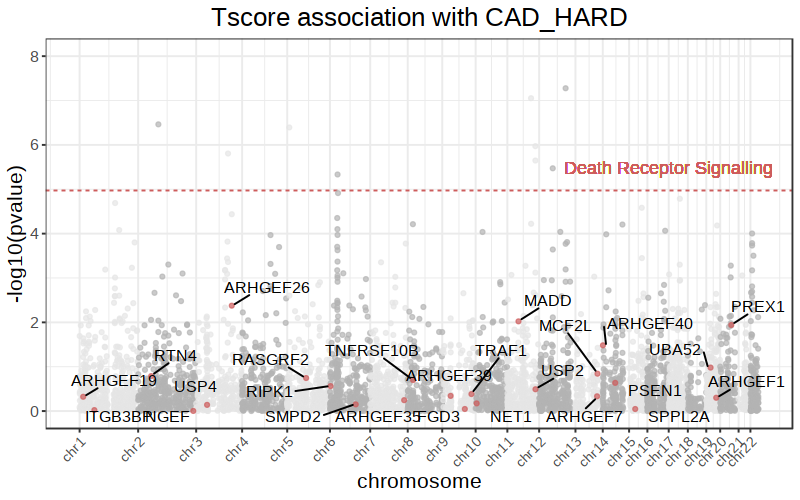

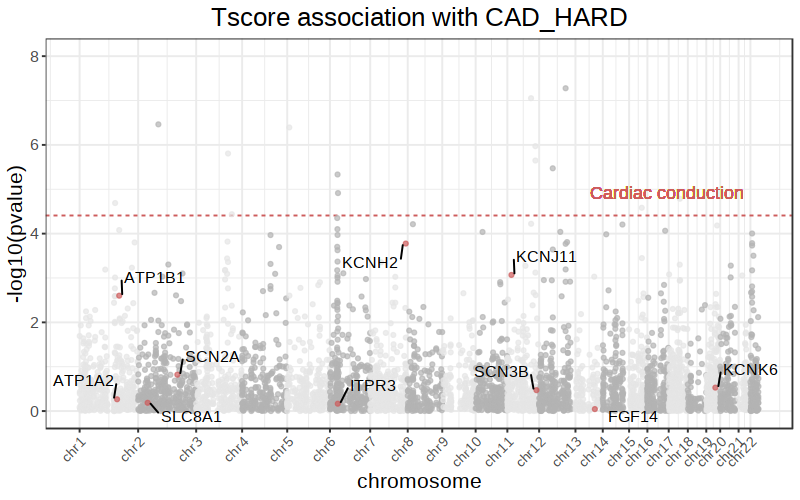

In [18]:
###################################
### showcase pathway enrichment ###
###################################
# Fig. 1F, S5C
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 100)

train_fold_original <- 'CAD_UKBB/eQTL_PROJECT/OUTPUT_GTEx/train_GTEx/'
tissue <- 'Artery_Aorta'
pathways <- c('Death Receptor Signalling', 'Cardiac conduction')
fold_tissue <- 'CAD_UKBB/eQTL_PROJECT/OUTPUT_GTEx/predict_CAD/Artery_Aorta/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/'
fold_geno_input <- 'CAD_UKBB/eQTL_PROJECT/INPUT_DATA_GTEx/GTEX_v6/Genotyping_data/Genotype_VariantsInfo_GTEx-PGCgwas-CADgwas-CADall-UKBB_'
id_pval <- 1

for(pathway in pathways){
    
    print(pathway)
    color_tmp <- color_tissues$color[color_tissues$tissues == tissue]
    info_res <- get(load(sprintf('%spval_CAD_pheno_covCorr.RData', fold_tissue[1])))
    id <- which(info_res$pathScore_reactome[[id_pval]]$path == pathway)
    genes_path <- info_res$info_pathScore_reactome[[id_pval]][[id]]
    gene_res <- info_res$tscore[[id_pval]]
    gene_info <- fread(sprintf('%sresPrior_regEval_allchr.txt', train_fold[grepl(tissue, train_fold)]), h=T,stringsAsFactors = F, data.table = F)
    resBeta <- get(load(sprintf('%sresPrior_regCoeffSnps_allchr.RData',  train_fold[grepl(tissue, train_fold)])))
    train_fold_tissue <- train_fold[grepl(tissue, train_fold)]
    
    # save
    pl <- plot_showcase(gene_res = gene_res, gene_info = gene_info, genes_path = genes_path, 
                  tissue = tissue, pathway = pathway, color_tmp = color_tmp, id_pval_path = 13, 
                  pheno = pheno, fold = out_fold, resBeta = resBeta, train_fold_tissue = train_fold_tissue, 
                  fold_geno_input_tmp = fold_geno_input, 
                  train_fold_original_tmp = train_fold_original, name_gwas_pval = 'CAD_p_dgc')
    # warnings refer to most significant associations (in general) that are removed if not used in the pathway for display reasons
    # plot
    print(pl$pl_manh)    
}

  